In [1]:
import numpy as np
from scipy import integrate as integ
from scipy import signal as signal
import sympy as sp
import matplotlib
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets
from tqdm import tqdm

In [2]:
def slow(var, t):
    # fill var
    N_a = var[0]
    N_b = var[1]
    A_a = var[2]
    A_b = var[3]
    H_1a = var[4]
    H_1b = var[5]
    H_2a = var[6]
    H_2b = var[7]
    dd_H1a = var[8]
    d_H2a = var[9]
    d_H1b = var[10]
    d_H2b = var[11]
    H1_loss = var[12]
    H2_loss = var[13]

    # growth rate of autotrophs
    r_a = (r_max * N_a) / (N_h + N_a)
    r_b = (r_max * N_b) / (N_h + N_b)

    # growth rate of competitors
    g_1a = (a_1 * A_a) / (1 + a_1 * h * A_a)
    g_1b = (a_1 * A_b) / (1 + a_1 * h * A_b)
    g_2a = (a_2 * A_a) / (1 + a_2 * h * A_a)
    g_2b = (a_2 * A_b) / (1 + a_2 * h * A_b)

    # inflection points
    x_01 = D / (a_1 * (e - h * D))
    x_02 = D / (a_2 * (e - h * D))
    
    # dispersal rates of competitors
    d_H1a = d_Hmax1 / (1 + np.exp(k_1 * (A_a - x_01)))
    d_H1b = d_Hmax1 / (1 + np.exp(k_1 * (A_b - x_01)))
    d_H2a = d_Hmax2 / (1 + np.exp(k_2 * (A_a - x_02)))
    d_H2b = d_Hmax2 / (1 + np.exp(k_2 * (A_b - x_02)))

    # change of nutrients
    dN_a = D * (S - N_a) - r_a * A_a + d_N * (N_b - N_a)
    dN_b = D * (S - N_b) - r_b * A_b + d_N * (N_a - N_b)

    # change of autotrophs
    dA_a = r_a * A_a - ((g_1a * H_1a) + (g_2a * H_2a)) - D * A_a + d_A * (A_b - A_a)
    dA_b = r_b * A_b - ((g_1b * H_1b) + (g_2b * H_2b)) - D * A_b + d_A * (A_a - A_b)

    # change of competitors
    dH_1a = e * g_1a * H_1a - D * H_1a - d_H1a * H_1a + d_H1b * H_1b
    dH_1b = e * g_1b * H_1b - D * H_1b - d_H1b * H_1b + d_H1a * H_1a
    dH_2a = e * g_2a * H_2a - D * H_2a - d_H2a * H_2a + d_H2b * H_2b
    dH_2b = e * g_2b * H_2b - D * H_2b - d_H2b * H_2b + d_H2a * H_2a

    H1_loss = d_H1a-(d_H1a * dH_1a)/(1 + np.exp(k_1 * (A_a - x_01)))
    H2_loss = d_H2a-(d_H2a * dH_2a)/(1 + np.exp(k_2 * (A_a - x_02)))

    return(dN_a, dN_b, dA_a, dA_b, dH_1a, dH_1b, dH_2a, dH_2b, d_H1a, d_H2a, d_H1b, d_H2b, H1_loss, H2_loss)

In [3]:
# var
var = []

# set parameters
S = 4.8 # Nutrient supply concentration
D = 0.3 # Dilution rate
N_h = 1.5 # half saturation constant for nutrient uptake
r_max = 0.7 # growth rate of autotroph
h = 0.53 # handling time
e = 0.33 # conversion efficiency of competitor
d_N = 1 # Dispersal rate of nutrients 
d_A = 0.001 # dispersal rate of autotrophs

# competitiveness 
a_1 = 1 # attack rate of competitor 1 
a_2 = 1 # attack rate of competitor 2 

# adaptability
k_1 = 0 # dispersal adaptability of competitor 1 
k_2 = 2 # dispersal adaptability of competitor 2 
        # 0 = random dispersal, 2 = adaptive dispersal

# dispersal speed 
d_Hmax1 = 0.0001 # maximal dispersal rates of competitor 1  
d_Hmax2 = 0.0001 # maximal dispersal rates of competitor 2  

# time series
t_end = 400
number_steps = 20000
t = np.linspace(0,t_end,number_steps)

# initials:[N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.05, 0.1]

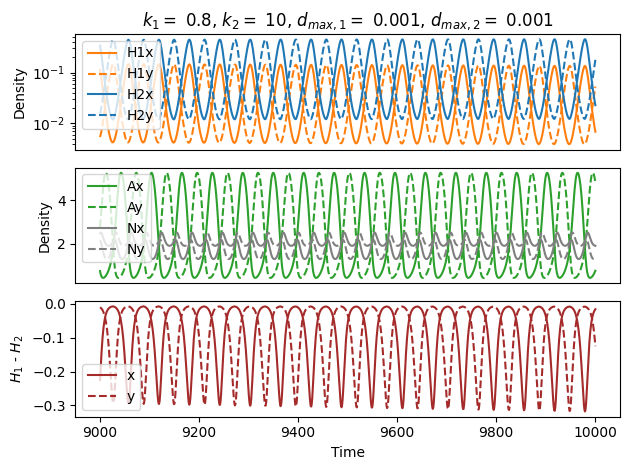

In [6]:
# fig, (ax1,ax2)=plt.subplots(2)
fig, (ax1,ax2,ax3)=plt.subplots(3)
#fig, ax1=plt.subplots()
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)

d_H1a = 0
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.30, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000
var = []
k_1 = 0.8
k_2 = 10
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
var = integ.odeint(slow, var0, t1)
t_end = 10000
number_steps = 10000
t = np.linspace(0, t_end, number_steps)
var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0]
var = integ.odeint(slow, var00, t)

# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--")
ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Density")
ax1.legend(loc="upper left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:end], var[start:end:, 2], label="Ax",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ay",color="tab:green", linestyle="--")
ax2.plot(t[start:end], var[start:end:, 0], label="Nx",color="tab:grey")
ax2.plot(t[start:end], var[start:end:, 1], label="Ny",color="tab:grey", linestyle="--")
ax2.get_xaxis().set_visible(False)
# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
# ax2.set_xlim(10005,10075)
ax2.legend(loc="upper left")
ax3.plot(t[start:end], var[start:end, 4]-var[start:end, 6], label="x",color="brown")
ax3.plot(t[start:end], var[start:end, 5]-var[start:end, 7], label="y",color="brown", linestyle="--")
ax3.set_xlabel("Time")
ax3.set_ylabel("$H_1$ - $H_2$")
ax3.legend()
# ax3.set_yscale("log")
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")

In [ ]:
# Add a list to store intermediate d_H1a values
intermediate_d_H1a = []

# Perform integration and save intermediate d_H1a values at specific time steps
for i, time_step in tqdm(enumerate(t)):
    var = integ.odeint(slow, var00, [0, time_step])  # Integrate up to the current time step
    d_H1a = var[-1, 8]  # Get d_H1a value from the integrated results
    intermediate_d_H1a.append(d_H1a)  # Save the value

    # Plotting every nth step (optional, adjust as needed)
    if i % 25 == 0:  # Change 100 to another value to control the frequency of plotting
        plt.close('all')
    if i % 25 == 0:
        plt.plot(t[:i+1], intermediate_d_H1a, label='Intermediate d_H1a')
        plt.xlabel('Time')
        plt.ylabel('d_H1a')
        plt.show()

In [ ]:
import time
t_end = 500
number_steps = 500
t = np.linspace(0, t_end, number_steps)
intermediate_d_H1a = []

plt.ion()
fig, ax = plt.subplots()

# Perform integration and update the plot with intermediate d_H1a values
for i, time_step in tqdm(enumerate(t)):
    var = integ.odeint(slow, var00, [0, time_step])  # Integrate up to the current time step
    d_H1a = var[-1, 8]  # Get d_H1a value from the integrated results
    intermediate_d_H1a.append(d_H1a)  # Save the value

    # Plotting every nth step (optional, adjust as needed)
    if i % 1 == 0:  # Change 100 to another value to control the frequency of updating
        # Create the initial plot
        
        
        ax.set_xlabel('Time')
        ax.set_ylabel('d_H1a')
        ax.set_title('Intermediate d_H1a over Time')
        line1, = ax.plot(t[:i+1], intermediate_d_H1a)
        line1.set_xdata(t[:i+1])  # Update x-axis data
        line1.set_ydata(intermediate_d_H1a)  # Update y-axis data
        fig.canvas.draw()  # Redraw the figure
        fig.canvas.flush_events()  # Flush any pending figure events
        time.sleep(0.1)
